# [導讀] 股票市場的預測
* <a href='http://www.pcstore.com.tw/pchome24h/M19720645.htm'>基礎R語言與商業應用：第八章</a>
* C.Y. Yen
* July @ TW RLadies

### Outline
* 問題：使用歷史資料來預測單一股票的未來績效表現
* 處理流程：
    1. 取得股價時間序列：以 xts 套件整理
    2. 目標是什麼：定義交易邏輯               
    3. 預測變數是什麼：以 Random Forest 選擇重要的變數 (降維)
    4. 建模型：以 Support Vector Machine 做分類
    5. 評估模型表現

### 在這個章節中，你需要了解的 Machine Learning Algorithm
* Random Forest 隨機森林
* Support Vector Machine 支援向量機

#### Decision Tree & Random Forest
<iframe src="//www.slideshare.net/slideshow/embed_code/key/lMYAC22RJJGYfj" width="425" height="355" frameborder="0" marginwidth="0" marginheight="0" scrolling="no" style="border:1px solid #CCC; border-width:1px; margin-bottom:5px; max-width: 100%;" allowfullscreen> </iframe> <div style="margin-bottom:5px"> <strong> <a href="//www.slideshare.net/DebdootSheet/decision-trees-and-random-forests" title="Decision trees and random forests" target="_blank">Decision trees and random forests</a> </strong> from <strong><a href="//www.slideshare.net/DebdootSheet" target="_blank">Debdoot Sheet</a></strong> </div>

#### Support Vector Machine
<img src='fig/svm_spirit.png'>

<img src='fig/support_vector.png'>

#### 1.取得股價時間序列：以 xts 套件整理

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
    As of 0.4-0, ‘getSymbols’ uses env=parent.frame() and
 auto.assign=TRUE by default.

 This  behavior  will be  phased out in 0.5-0  when the call  will
 default to use auto.assign=FALSE. getOption("getSymbols.env") and 
 getOptions("getSymbols.auto.assign") are now checked for alternate defaults

 This message is shown once per session and may be disabled by setting 
 options("getSymbols.warning4.0"=FALSE). See ?getSymbol for more details


[1] "SSEC"

           SSEC.Open SSEC.High SSEC.Low SSEC.Close SSEC.Volume SSEC.Adjusted
2007-01-04  2728.188  2847.615 2684.818   2715.719      120200      2715.719
2007-01-05  2668.577  2685.804 2617.019   2641.334      106200      2641.334
2007-01-08  2621.068  2708.444 2620.625   2707.199      106800      2707.199
2007-01-09  2711.049  2809.394 2691.360   2807.804      110800      2807.804
2007-01-10  2838.113  2841.741 2770.988   2825.576      111800      2825.576
2007-01-11  2819.367  2841.180 2763.886   2770.110      121600      2770.110

[1] "xts" "zoo"

Warning message:
In axis(1, at = 1 + x@bp * x@spacing - x@spacing, labels = x@x.labels, : conversion failure on ' 1月 04' in 'mbcsToSbcs': dot substituted for <e6>Warning message:
In axis(1, at = 1 + x@bp * x@spacing - x@spacing, labels = x@x.labels, : conversion failure on ' 1月 04' in 'mbcsToSbcs': dot substituted for <9c>Warning message:
In axis(1, at = 1 + x@bp * x@spacing - x@spacing, labels = x@x.labels, : conversion failure on ' 1月 04' in 'mbcsToSbcs': dot substituted for <88>Warning message:
In axis(1, at = 1 + x@bp * x@spacing - x@spacing, labels = x@x.labels, : conversion failure on ' 1月 04' in 'mbcsToSbcs': dot substituted for <e6>Warning message:
In axis(1, at = 1 + x@bp * x@spacing - x@spacing, labels = x@x.labels, : conversion failure on ' 1月 04' in 'mbcsToSbcs': dot substituted for <9c>Warning message:
In axis(1, at = 1 + x@bp * x@spacing - x@spacing, labels = x@x.labels, : conversion failure on ' 1月 04' in 'mbcsToSbcs': dot substituted for <88>Warning message:
In axis(1, 

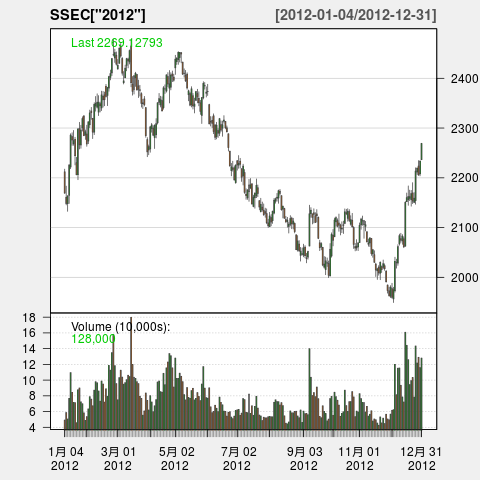

ERROR: Error in AvgPrice(on = 1): 沒有這個函數 "avg"


            x  y
2012-05-23  1 13
2012-05-24  2 12
2012-05-25  3 11
2012-05-26  4 10
2012-05-27  5  9
2012-05-28  6  8
2012-05-29  7  7
2012-05-30  8  6
2012-05-31  9  5
2012-06-01 10  4
2012-06-02 11  3
2012-06-03 12  2
2012-06-04 13  1

[1] "xts" "zoo"

           x  y
2012-05-23 1 13
2012-05-24 2 12

           x  y
2012-05-23 1 13

            x y
2012-05-29  7 7
2012-05-30  8 6
2012-05-31  9 5
2012-06-01 10 4
2012-06-02 11 3
2012-06-03 12 2
2012-06-04 13 1

           x  y
2012-05-23 1 13

           x  y
2012-05-23 1 13

            x y
2012-06-01 10 4
2012-06-02 11 3
2012-06-03 12 2
2012-06-04 13 1

 [1] "2012-05-23 CST" "2012-05-24 CST" "2012-05-25 CST" "2012-05-26 CST"
 [5] "2012-05-27 CST" "2012-05-28 CST" "2012-05-29 CST" "2012-05-30 CST"
 [9] "2012-05-31 CST" "2012-06-01 CST" "2012-06-02 CST" "2012-06-03 CST"
[13] "2012-06-04 CST"

       x  y
 [1,]  1 13
 [2,]  2 12
 [3,]  3 11
 [4,]  4 10
 [5,]  5  9
 [6,]  6  8
 [7,]  7  7
 [8,]  8  6
 [9,]  9  5
[10,] 10  4
[11,] 11  3
[12,] 12  2
[13,] 13  1

In [1]:
library(quantmod)
getSymbols(Symbols = "^SSEC",src = "yahoo")
head(SSEC)
class(SSEC)
candleChart(x=SSEC["2012"], theme="white")
avg <- function(x) rowMeans(HLC(x))
AvgPrice <- newTA(FUN=avg,col="white",legend.name="AvgPrice")
AvgPrice(on=1)
#----------------------------------------
# Package xts
#----------------------------------------
library(xts)
(x <- xts(x=data.frame(x=1:13,y=13:1), 
order.by=seq(from=as.POSIXct("2012-05-23"),length.out=13,by="day")))
class(x)
x[1:2,]
x["2012-05-23"]
x["2012-05-29/"]
x["2012-05-21/2012-05-23"]
x["2012-05-23"]
x["2012-06"]
time(x)
coredata(x)

#### 2. 目標是什麼：定義交易邏輯               
   

In [2]:
#------------------------------------------------
# Get the measurement index - Profit > Cost
#T.Index <- function(data,p,k)
# ------------------------------------------------
p <- 0.025
k <- 10
hlc <- HLC(SSEC["2012"])
P <- rowMeans(hlc)
V <- matrix(NA,ncol=k, nrow=NROW(P))
for (i in 1:k)
{
  V[,i] <- Next(Delt(P,k=i),k=i)
}
T <- apply(V,1,function(x) sum(x[abs(x) > p]))
T <- xts(x=T, order.by=time(SSEC["2012"]))


#----------------------------------------
# Optimize - To perform as a function
# T.Index <- function(data,p,k)
#----------------------------------------

T.Index <- function(data,p,k)
{
  hlc <- HLC(data)
  #hlc <- HLC(SSEC["2012"])
  P <- rowMeans(hlc)
  V <- matrix(NA,ncol=k,nrow=NROW(P))
  for (i in 1:k) 
  {
    V[,i] <- Next(Delt(P,k=i), k=i)
  }
  T <- apply(V,1,function(x) sum(x[abs(x) > p]))
  T <- xts(x=T, order.by=time(data))
  return(T)
}
#T <- T.Index(data=SSEC["2012"],p=0.025,k=10)
T <- T.Index(data=SSEC["2012"],p=0.025,k=10)

#### 3. 預測變數是什麼：以 Random Forest 選擇重要的變數 (降維)

In [19]:
#----------------------------------------
# Prediction Approach
#----------------------------------------
require(TTR)
require(quantmod)
myTTR <- function(data)
{
  names(data) <- sapply(X=names(SSEC),FUN=function(x) strsplit(x,split=".",fixed=TRUE) [[1]] [2])
  myATR <- ATR(HLC(data))$atr
  mySMI <- SMI(HLC(data))$SMI
  myADX <- ADX(HLC(data))$ADX
  myAroon <- aroon(HLC(data)[,-3])$oscillator
  myBBands <- BBands(HLC(data))$pctB
  myChaikin <- Delt(chaikinVolatility(HLC(data)[,-3]))[,1]
  myCLV <- EMA(CLV(HLC(data)))[,1]
  myMACD <- MACD(data[,"Close"])[,2]
  myMFI <- MFI(data[,c("High","Low","Close")],data[,"Volume"])
  mySAR <- SAR(data[,c("High","Close")])[,1]
  result <- cbind(myATR,mySMI,myADX,myAroon,myBBands,myChaikin,myCLV,myMACD,myMFI,mySAR)
  colnames(result) <- c("myATR","mySMI","myADX","myAroon","myBBands","myChaikin","myCLV","myMACD","myMFI","mySAR")
  return(result)
}

#----------------------------------------
#Forrest Random
#----------------------------------------
#require(quantmod)

# decision tree:  http://www.slideshare.net/DebdootSheet/decision-trees-and-random-forests
require(randomForest)

model <- specifyModel(formula=T.Index(SSEC,p=0.025,k=10) ~ Delt(Cl(SSEC),k=1:10)+
                      myTTR(SSEC)+runMean(Cl(SSEC))+runSD(Cl(SSEC)),
                      na.rm=TRUE)

set.seed(42)
#---------------------------------------
# below builModel took a bit minutes
#---------------------------------------
rf <- buildModel(x=model,method="randomForest",training.per=c(start(SSEC),index(SSEC["2011-10-12"])))
varImpPlot(rf@fitted.model)
x <- importance(rf@fitted.model)
#@: S4: http://adv-r.had.co.nz/S4.html
rownames(x) [x >12]

#----------------------------------------
# Model's Prediction
#----------------------------------------
myTTR.data <- myTTR(SSEC)[,c("myATR","mySMI","myADX","myMACD","mySAR")]
model.data <- specifyModel(formula=T.Index(SSEC,p=0.025,k=10) ~ myTTR.data+runMean(Cl(SSEC)))
train.data <- as.data.frame(modelData(model.data,data.window=c(start(SSEC),"2012-12-31")))
test.data <- as.data.frame(modelData(model.data, data.window=c(as.Date("2013-01-05"), end(SSEC))))
colnames(train.data) <- c("T","myATR","mySMI","myADX","myMACD","mySAR","runMean")
colnames (test.data) <- c("T","myATR","mySMI","myADX","myMACD","mySAR","runMean")
form <- as.formula("T~.")

Warning message:
In download.file(paste(yahoo.URL, "s=", Symbols.name, "&a=", from.m, : 無法開啟: HTTP 狀態是 '404Not Found'

ERROR: Error in download.file(paste(yahoo.URL, "s=", Symbols.name, "&a=", from.m, : 無法開啟 URL 'http://ichart.finance.yahoo.com/table.csv?s=SSEC&a=0&b=01&c=2007&d=6&e=27&f=2015&g=d&q=q&y=0&z=SSEC&x=.csv'


ERROR: Error in buildModel(x = model, method = "randomForest", training.per = c(start(SSEC), : 找不到物件 'model'


ERROR: Error in inherits(x, "randomForest"): 無法從沒有插槽的基本類別 ("function") 的物件中取得 "fitted.model" 插槽


ERROR: Error in importance(rf@fitted.model): 無法從沒有插槽的基本類別 ("function") 的物件中取得 "fitted.model" 插槽


NULL

Warning message:
In download.file(paste(yahoo.URL, "s=", Symbols.name, "&a=", from.m, : 無法開啟: HTTP 狀態是 '404Not Found'

ERROR: Error in download.file(paste(yahoo.URL, "s=", Symbols.name, "&a=", from.m, : 無法開啟 URL 'http://ichart.finance.yahoo.com/table.csv?s=SSEC&a=0&b=01&c=2007&d=6&e=27&f=2015&g=d&q=q&y=0&z=SSEC&x=.csv'


ERROR: Error in modelData(model.data, data.window = c(start(SSEC), "2012-12-31")): 找不到物件 'model.data'


ERROR: Error in modelData(model.data, data.window = c(as.Date("2013-01-05"), : 找不到物件 'model.data'


ERROR: Error in colnames(train.data) <- c("T", "myATR", "mySMI", "myADX", "myMACD", : 找不到物件 'train.data'


ERROR: Error in colnames(test.data) <- c("T", "myATR", "mySMI", "myADX", "myMACD", : 找不到物件 'test.data'


####   4. 建模型：以 Support Vector Machine 做分類


In [ ]:
library(e1071)
# svm 
# https://cg2010studio.wordpress.com/2012/05/20/%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%A9%9F%E5%99%A8-support-vector-machine/
m <- svm(form, train.data,cost=100)
p <- predict(m,na.omit(test.data))

#### 5. 評估模型表現

In [ ]:
#----------------------------------------
# To Use The Evaluation Prediciton Value
#----------------------------------------
T2Signal <- function(x,a1 = -0.01, a2 = -a1)
{
  result <- ifelse(x < a1, "Sell", ifelse(x > a2, "Buy", "Hold"))
  result <- factor(result)
  return(result)
}

signal.p <- T2Signal(x=p, a1 = -0.095, a2 = 0.095)
signal.true <- T2Signal(x=na.omit(test.data)$T, a1 = -0.095, a2 = 0.095)
table(signal.p, signal.true)

accuracy <- function(prediction, true)
{
  t <- table(prediction, true)
  result <- (t["Sell", "Sell"] + t["Buy","Buy"]) / (sum(t["Buy",]) + sum(t["Sell",]))
  return(result)
}

accuracy(signal.p, signal.true)

a1 <- -seq(0.001, 0.2, length.out=50)
a2 <- -a1

ac <- function(a1,a2)
{
  signal.p <- T2Signal(x=p, a1=a1, a2=a2)
  signal.true <- T2Signal(x=na.omit(test.data)$T, a1=a2, a2=a2)
  accuracy(prediction=signal.p, true=signal.true)
}

#reault might take for 5 seconds
reault <- outer(X=a1, Y=a2, FUN = Vectorize(ac, vectorize.args=c("a1","a2")))
ind <- which(max(reault)==reault, arr.ind=TRUE)
cbind(a1[ind[,1]], a2[ind[,2]])

filled.contour(x=-a1*100, y=a2*100, z=reault, 
               color= terrain.colors, plot.title = title(main = "The Accuracy",
               xlab = expression(paste(alpha[1], " ", 10^-2)), 
               ylab = expression(paste(alpha[2], " ", 10^-2))),             
               key.title = title(main = "Accuracy"),
               key.axes = axis(4, seq(0, 1, by = 0.05)))